<a href="https://colab.research.google.com/github/sprucesunday777/nsisong-data-science/blob/main/Course.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
!pip install datasist
import datasist as ds

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.4/93.4 kB 8.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 58.7 MB/s eta 0:00:00


In [2]:
df = pd.read_csv('/content/courses-formatted.csv',index_col='id')

In [3]:
df.head()

,Course Name
id,
1,AngloSaxon Norse and Celtic BA Hons
2,Archaeology BA Hons
3,Architecture BA Hons
4,Asian and Middle Eastern Studies BA Hons
5,Chemical Engineering and Biotechnology MEng H...


In [4]:
len(df)

33625

## dropping of irrelevant data

In [6]:
ds.feature_engineering.drop_redundant(data=df)

Dropped []


,Course Name
id,
1,AngloSaxon Norse and Celtic BA Hons
2,Archaeology BA Hons
3,Architecture BA Hons
4,Asian and Middle Eastern Studies BA Hons
5,Chemical Engineering and Biotechnology MEng H...
...,...
33621,Visual Communication and Design BA Hons
33622,Visual Communication HNC
33623,Visual Communication HND


In [7]:
len(df)

33625

## dropping of duplicate

In [8]:
df = df.drop_duplicates()

In [9]:
len(df)

23562

## modelling

In [ ]:
X = df['Course Name']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()

In [ ]:
X = vectorizer.fit_transform(X)

In [ ]:
vectorizer.get_feature_names_out(X)

array(['08', '10', '1116', ..., 'zero', 'zoo', 'zoology'], dtype=object)

In [ ]:
print(X.shape)

(23562, 2289)


In [ ]:
kmeans = KMeans(init="random", n_clusters=9, n_init=5, max_iter=100, random_state=42 )
kmeans.fit(X)

KMeans(init='random', max_iter=100, n_clusters=9, n_init=5, random_state=42)

In [ ]:
len(kmeans.labels_)

23562

In [ ]:
df['faculties'] = kmeans.labels_

In [ ]:
df.head()

,Course Name,faculties
id,,
1,AngloSaxon Norse and Celtic BA Hons,1
2,Archaeology BA Hons,1
3,Architecture BA Hons,1
4,Asian and Middle Eastern Studies BA Hons,1
5,Chemical Engineering and Biotechnology MEng H...,3


In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
    }

    # A list holds the SSE values for each k
sse = []
for k in range(1, 12):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)

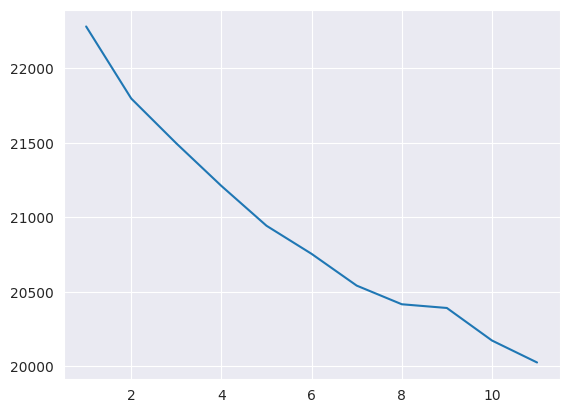

In [ ]:
sns.set_style('darkgrid')
plt.plot(range(1, 12), sse)  #so here we can see that 9 is a much better option

In [ ]:
faculties = {1:'Arts', 2:'Physics', 3:'Engineering', 4:'Social Sciences', 5:'Health', 6:'Music', 7:'Sciences', 8:'Business Administration'}

In [ ]:
df['faculties']=df['faculties'].map(faculties)

In [ ]:
df.head(10)

,Course Name,faculties
id,,
1,AngloSaxon Norse and Celtic BA Hons,Arts
2,Archaeology BA Hons,Arts
3,Architecture BA Hons,Arts
4,Asian and Middle Eastern Studies BA Hons,Arts
5,Chemical Engineering and Biotechnology MEng H...,Engineering
6,Classics 4 years BA Hons,Arts
7,Classics BA Hons,Arts
8,Computer Science BA Hons,Sciences
9,Computer Science MEng Hons,Sciences


In [ ]:
df.isnull().sum()

Course Name      0
faculties      513
dtype: int64

In [ ]:
df1=df.dropna()

In [ ]:
df.head()

,Course Name,faculties
id,,
1,AngloSaxon Norse and Celtic BA Hons,Arts
2,Archaeology BA Hons,Arts
3,Architecture BA Hons,Arts
4,Asian and Middle Eastern Studies BA Hons,Arts
5,Chemical Engineering and Biotechnology MEng H...,Engineering


In [ ]:
df1.shape

(23049, 2)

In [ ]:
df1 = df1.drop_duplicates()

In [ ]:
df1.shape

(23049, 2)

## Downloading the file into CSV file format

In [ ]:


from IPython.display import display, HTML
csv_link = df.to_csv(index=False)
display(HTML(f'<a href="data:text/csv;charset=utf-8,{csv_link}" download="table.csv">Download Table as CSV</a>'))

In [ ]:
df.to_csv('df.csv', index=False)

##saving the model for deployment

In [ ]:
import pickle

In [ ]:
file=open('kmeans.pkl','wb')
pickle.dump(kmeans,file)